In [22]:
from sklearn.datasets import make_circles
from torch import nn
import torch

In [3]:
n_samples = 1000
X,y = make_circles(n_samples, random_state=42, noise=0.03)

In [5]:
import pandas as pd

In [11]:
df = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'y': y,
})
df['y'].value_counts()

y
1    500
0    500
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

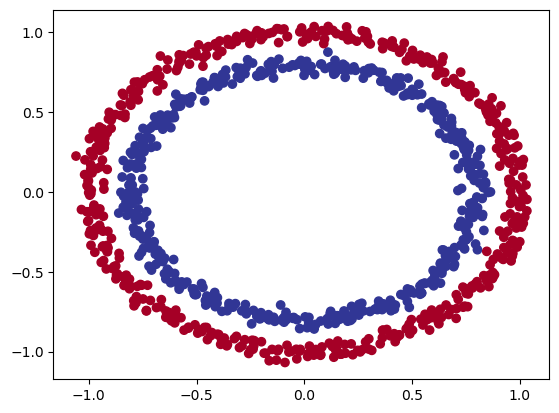

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [111]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## lets Build Binary Classification

In [112]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10, device=device)
        self.layer_2 = nn.Linear(in_features=10, out_features=10, device=device)
        self.layer_3 = nn.Linear(in_features=10, out_features=1, device=device)
        self.relu = nn.ReLU()
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [151]:
model_bc = BinaryClassification()
print(model_bc.state_dict())
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_bc.parameters(), lr = 0.1)

OrderedDict([('layer_1.weight', tensor([[ 0.4395, -0.3289],
        [ 0.4628, -0.2674],
        [-0.1460, -0.1564],
        [ 0.3606, -0.0241],
        [ 0.1788,  0.6298],
        [-0.0396,  0.0293],
        [ 0.3803, -0.4660],
        [ 0.2544, -0.3035],
        [-0.6797,  0.3143],
        [ 0.6300,  0.6219]], device='cuda:0')), ('layer_1.bias', tensor([-0.0107, -0.5130, -0.3157, -0.5473, -0.0562,  0.4836,  0.4436, -0.5019,
         0.2476,  0.3367], device='cuda:0')), ('layer_2.weight', tensor([[ 0.1646,  0.2740,  0.0979, -0.1901,  0.0073, -0.2858,  0.2348, -0.0883,
         -0.1030,  0.1141],
        [ 0.2117,  0.2930, -0.2287,  0.0844, -0.0672, -0.2365,  0.0481,  0.0270,
          0.1160,  0.3158],
        [-0.2965,  0.1630, -0.0787,  0.1910, -0.2631,  0.0768, -0.2356, -0.1715,
         -0.1953,  0.0808],
        [-0.1294,  0.0573, -0.2320,  0.1740, -0.0278,  0.0698, -0.3014,  0.0113,
         -0.1312, -0.0175],
        [-0.0197,  0.2997, -0.0989,  0.0973, -0.2970,  0.2528, -0.1818

In [152]:
def accuracy_fn(y_pred, y_actual):
    return (sum(torch.eq(y_pred, y_actual)) / y_pred.shape[0]) * 100

def train_(model, X, y, loss, optimizer, device, epoch):
    # forward
    y_logits = model(X.to(device)).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    # print(y_logits.shape)
    # print(X[:3])
    # print(y_logits[:3])
    
    # print(y.shape)
    

    # loss
    loss_ = loss(y_logits, y.to(device))
    # zero grad
    optimizer.zero_grad()
    # backpropagation
    loss_.backward()

    # step
    optimizer.step()
    if (epoch % 1000 == 0):
        print(accuracy_fn(y_pred, y.to(device)))
        acc = Accuracy(task='binary', num_classes=2).to(device)
        print(acc(y_pred, y.to(device)))
        print(loss_, epoch)
    

In [153]:
count = 0
while count <= 10000:
    train_(model_bc.to(device), torch.from_numpy(X_train).type(torch.float), torch.from_numpy(y_train).type(torch.float), loss, optimizer, device, count)
    count += 1
# X_train, y_train

tensor(50., device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.6985, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) 0
tensor(99.5000, device='cuda:0')
tensor(0.9950, device='cuda:0')
tensor(0.2325, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) 1000
tensor(100., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.0190, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) 2000
tensor(100., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.0084, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) 3000
tensor(100., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.0053, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) 4000
tensor(100., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.0038, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) 5000
tensor(100., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0.0029, device='cuda:0

In [154]:
def eval_data(model, X, y, loss, device):
    model.eval()
    print(device)
    acc = Accuracy(task='binary', num_classes=2).to(device)
    with torch.inference_mode():
        y_logits = model(X.to(device)).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))
        loss_ = loss(y_pred, y.to(device))
        print(accuracy_fn(y_pred, y.to(device)))
        print(acc(y_pred, y.to(device)))
        

In [155]:
eval_data(model_bc.to(device), torch.from_numpy(X_test).type(torch.float), torch.from_numpy(y_test).type(torch.float), loss, device)

cuda
tensor(100., device='cuda:0')
tensor(1., device='cuda:0')


In [156]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


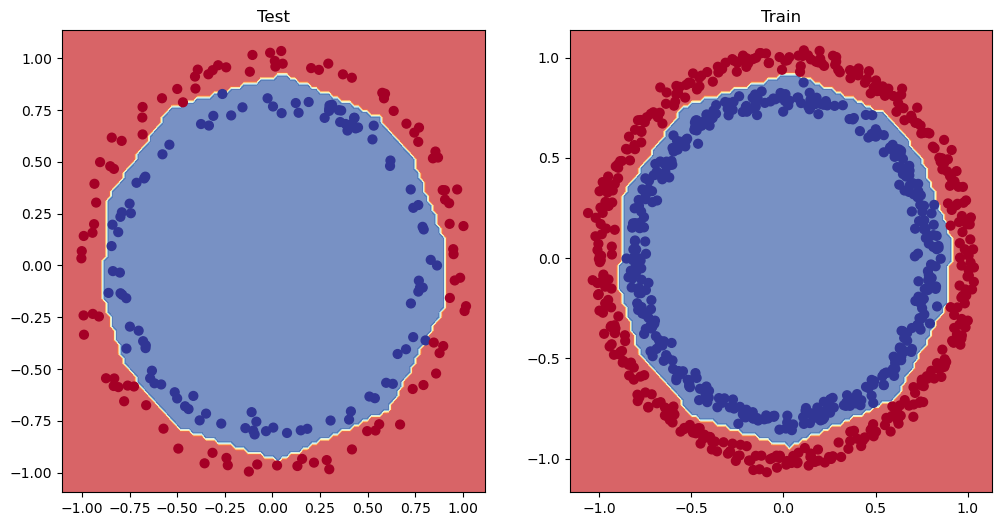

In [157]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_bc,torch.from_numpy(X_test).type(torch.float), torch.from_numpy(y_test).type(torch.float))
plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model_bc,torch.from_numpy(X_train).type(torch.float), torch.from_numpy(y_train).type(torch.float))


In [158]:
import torchmetrics

In [159]:
!pip install torchmetrics

In [160]:
from torchmetrics import Accuracy

In [162]:
lo = torch.arange(0, 1, 0.002)

In [163]:
lo


tensor([0.0000, 0.0020, 0.0040, 0.0060, 0.0080, 0.0100, 0.0120, 0.0140, 0.0160,
        0.0180, 0.0200, 0.0220, 0.0240, 0.0260, 0.0280, 0.0300, 0.0320, 0.0340,
        0.0360, 0.0380, 0.0400, 0.0420, 0.0440, 0.0460, 0.0480, 0.0500, 0.0520,
        0.0540, 0.0560, 0.0580, 0.0600, 0.0620, 0.0640, 0.0660, 0.0680, 0.0700,
        0.0720, 0.0740, 0.0760, 0.0780, 0.0800, 0.0820, 0.0840, 0.0860, 0.0880,
        0.0900, 0.0920, 0.0940, 0.0960, 0.0980, 0.1000, 0.1020, 0.1040, 0.1060,
        0.1080, 0.1100, 0.1120, 0.1140, 0.1160, 0.1180, 0.1200, 0.1220, 0.1240,
        0.1260, 0.1280, 0.1300, 0.1320, 0.1340, 0.1360, 0.1380, 0.1400, 0.1420,
        0.1440, 0.1460, 0.1480, 0.1500, 0.1520, 0.1540, 0.1560, 0.1580, 0.1600,
        0.1620, 0.1640, 0.1660, 0.1680, 0.1700, 0.1720, 0.1740, 0.1760, 0.1780,
        0.1800, 0.1820, 0.1840, 0.1860, 0.1880, 0.1900, 0.1920, 0.1940, 0.1960,
        0.1980, 0.2000, 0.2020, 0.2040, 0.2060, 0.2080, 0.2100, 0.2120, 0.2140,
        0.2160, 0.2180, 0.2200, 0.2220, 

In [169]:
torch.sigmoid(lo).argmax()

tensor(499)